# Mass-Casualty Triage Exercise
## Compbio Camp - February 2019
### Author: Eric Friedlander


# <span style='color:blue'>*YOUR NAME HERE*</span>

We are going to be modeling different patient admission policiees over the course of the 12 hours (720 minutes) following a mass-casualty event! By finding the best policy in different scenarios we can more effectively provide treatment and save lives.

## Modeling Patient Arrivals

The function below is commonly used to model the arrival intensity of patients. Notice that we need several packages in order to perform our analysis. There are two parameters: **num_pat** controls the number of patients expected on average and **peak** controls when the number of arrivals with be at its highest intensity. Try playing with the values and examine how it changes the intensity curve.

In [1]:
# Import all necessary packages
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

# Define patient arrival rate function
def arr_int(time, num_pats, peak_time):
    # num_pats determines the magnitude of the event (i.e. the number of patients)
    # peak_time controls when the peak arrival time will be
    t = time/60
    out = num_pats / 60 * (t)**(peak_time-1)*np.exp(-t)/(gamma(peak_time))
    return out

# Parameters for the curve
num_pat = 30
peak = 2.5

# Lets plot a sample of the arrival rate function
tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, arr_int(tp, num_pat, peak), color='black')
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.show() 

<Figure size 640x480 with 1 Axes>

Let's think about what would happen if the arrivals for IMMEDIATE (orange) and DELAYED (blue) patients looked different? Let's specificy a total number of patients **numPatients**, the ratio of IMMEDIATE to DELAYED patients **ratio**, and the peak arrival times of each types of patient **peakI**/**peakD**.

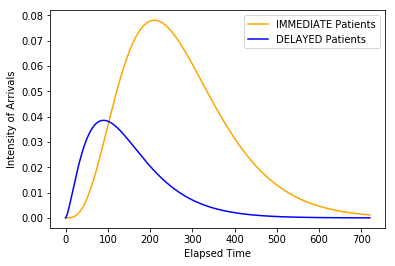

In [2]:
# Parameters for arrival processes
numPatients = 30 # Total number of patients on average
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients


# Compute parameters for functions
cI = numPatients / (1+ratio)
cD = numPatients - cI

# Lets plot the arrival rate functions for both classes of patients
tp = np.linspace(0, 720, num = 1000)
plt.plot(tp, arr_int(tp, cI, peakI), label='IMMEDIATE Patients', color='orange') # First plot for red patients
plt.plot(tp, arr_int(tp, cD, peakD), label='DELAYED Patients', color='blue') # First plot for green patients
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.legend()
plt.show() 

Let's see how a simulation might work. Run the cell below and follow the direction in the output.

In [43]:
# Parameters for arrival processes
numPatients = 30 # Total number of patients on average
ratio = 1/1 # Ratio of IMMEDIATE patients to DELAYED patients
peakI = 4.5 # This parameter controls when the peak of arrivals is for IMMEDIATE patients
peakD = 2.5 # This parameter controls when the peak of arrivals is for DELAYED patients


# Compute parameters for functions"
cI = numPatients / (1+ratio)
cD = numPatients - cI

# Import poisson process package
from tick.base import TimeFunction
from tick.hawkes import SimuInhomogeneousPoisson

tp = np.linspace(0, 720, num = 1000)
yI = arr_int(tp, cI, peakI)
yD = arr_int(tp, cD, peakD)
tfI = TimeFunction((tp, yI))
tfD = TimeFunction((tp, yD))
red_ind = np.random.binomial(1, ratio/(1+ratio))
ppI = SimuInhomogeneousPoisson([tfI], end_time=720, verbose=False)
ppD = SimuInhomogeneousPoisson([tfD], end_time=720, verbose=False)
ppI.simulate()
ppD.simulate()
if red_ind == 1:
    time = np.random.choice(ppI.timestamps[0])/720 * 120
    col = 'ORANGE'
else:
    time = np.random.choice(ppD.timestamps[0])/720 * 120
    col = 'BLUE'
print('Grab a '+ col + ' index card from the front and write ' + str(np.round(time,1)) + ' on it.')
    

Grab a BLUE index card from the front and write 38.1 on it.


To see a plot of a simulation of all patient arrivals run the next cell. The lines correspond to the arrival intensity, and the x's are the simulated arrivals.

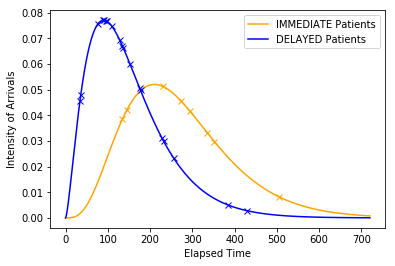

In [44]:
plt.plot(tp, arr_int(tp, cI, peakI), label='IMMEDIATE Patients', color='orange') # First plot for red patients
plt.plot(tp, arr_int(tp, cD, peakD), label='DELAYED Patients', color='blue') # First plot for green patients
plt.plot(ppI.timestamps[0], arr_int(ppI.timestamps[0], cI, peakI), color='orange', marker='x', linestyle='none')
plt.plot(ppD.timestamps[0], arr_int(ppD.timestamps[0], cD, peakD), color='blue', marker='x', linestyle='none')
plt.xlabel('Elapsed Time')
plt.ylabel('Intensity of Arrivals')
plt.legend()
plt.show() 